In [1]:
import pandas as pd

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.DataFrame(
{
    'name':['Ali','Zahid','Ubaid'],
    'age':[18,20,18]
}
)

In [4]:
df['age']=df['age'].replace({18:25 })

In [5]:
df

,name,age
0,Ali,25
1,Zahid,20
2,Ubaid,25


In [17]:
df.iloc[0,1]=27

In [18]:
df

,name,age
0,Ali,27
1,Zahid,20
2,Ubaid,25


In [19]:
df['name'].replace(['Ali','Zahid'],['No name', ' '])

0    No name
1           
2      Ubaid
Name: name, dtype: object

In [20]:
df['name'].replace({'Ali':'No name','Zahid': ' '})

0    No name
1           
2      Ubaid
Name: name, dtype: object

In [21]:
df['name'].replace(['Ali','Zahid'],'No name')

0    No name
1    No name
2      Ubaid
Name: name, dtype: object

In [22]:
df

,name,age
0,Ali,27
1,Zahid,20
2,Ubaid,25


In [23]:
#Map

In [26]:
df['age'].map(lambda age: 'Older' if age>25  else 'Younger')

0      Older
1    Younger
2    Younger
Name: age, dtype: object

In [27]:
#Assignment: What is the difference between map and apply

In [28]:
import numpy as np

In [29]:
df = pd.DataFrame(
    np.arange(0,12).reshape(3,4),
    index=['A','B','C'],
    columns = ['C1','C2','C3','C4']
)

In [34]:
display(df)
print(df.loc['A'])
print(df.iloc[1])

,C1,C2,C3,C4
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


C1    0
C2    1
C3    2
C4    3
Name: A, dtype: int32
C1    4
C2    5
C3    6
C4    7
Name: B, dtype: int32


In [42]:
#We can also apply map to index. Map can be used to convert a specific column or index to a new value

In [35]:
df.index

Index(['A', 'B', 'C'], dtype='object')

In [36]:
index_to_country = {
    'A': 'Australia',
    'B': 'Brazil',
    'C': 'China'
}

In [39]:
df.index = df.index.map(index_to_country)

In [40]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
China,8,9,10,11


In [41]:
df.loc['Australia']

C1    0
C2    1
C3    2
C4    3
Name: Australia, dtype: int32

In [43]:
#Other index methods

In [44]:
df.rename(index=str.upper, columns=str.lower) #Changing columns / index to uppper / lower case

,c1,c2,c3,c4
AUSTRALIA,0,1,2,3
BRAZIL,4,5,6,7
CHINA,8,9,10,11


In [46]:
df.rename(index={'China': 'Coulambia'}, 
            columns={'C1': 'C11'}) #Changing specific column and index

,C11,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Coulambia,8,9,10,11


In [47]:
df.rename(index={'China': 'Columabia'}, inplace=True) #doing inplace

In [48]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Columabia,8,9,10,11


In [54]:
#Discretization and binning: To place items into respective buckets/ bins if they lie in a specific range

In [ ]:
88+ -> A
75-87 -> B
60-74 -> C
<60 -> F

In [58]:
marks = [90, 22, 25, 67, 81, 83, 87] 
bins = [0,60,75, 88,100]
cats = pd.cut(marks, bins)

In [59]:
cats.codes

array([3, 0, 0, 1, 2, 2, 2], dtype=int8)

In [60]:
cats.categories

IntervalIndex([(0, 60], (60, 75], (75, 88], (88, 100]], dtype='interval[int64, right]')

In [ ]:
(,) - closed interval, exclusive
[ , ] - open interval, inclusive

In [62]:
pd.value_counts(cats)

(75, 88]     3
(0, 60]      2
(60, 75]     1
(88, 100]    1
dtype: int64

In [63]:
cats = pd.cut(marks, bins,labels=['F','C','B','A'])

In [68]:
pd.value_counts(cats)

B    3
F    2
C    1
A    1
dtype: int64

In [69]:
print(cats.categories)
print(cats.codes)

Index(['F', 'C', 'B', 'A'], dtype='object')
[3 0 0 1 2 2 2]


In [70]:
marks

[90, 22, 25, 67, 81, 83, 87]

In [72]:
#descriptive statistics, outliers removal

In [71]:
df.describe()

,C1,C2,C3,C4
count,3.0,3.0,3.0,3.0
mean,4.0,5.0,6.0,7.0
std,4.0,4.0,4.0,4.0
min,0.0,1.0,2.0,3.0
25%,2.0,3.0,4.0,5.0
50%,4.0,5.0,6.0,7.0
75%,6.0,7.0,8.0,9.0
max,8.0,9.0,10.0,11.0


In [73]:
df[np.abs(df['C2']) > 5]

,C1,C2,C3,C4
Columabia,8,9,10,11


In [75]:
#Capping data outside the range
#Capping putting the value on the edge values
df[np.abs(df['C2']) > 5] = np.sign(df) * 5   # -7 -> -5, 8->5

In [76]:
df

,C1,C2,C3,C4
Australia,0,1,2,3
Brazil,4,5,6,7
Columabia,5,5,5,5


In [77]:
#Merging two data frames: It's similar to SQL joins. We join two data frame based on a common column

In [81]:
df1 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Names':['John','Peter','Silbert']
    }
)

In [80]:
df2 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Salary':['150','170','190']
    }
)

In [83]:
display(df1)
display(df2)

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert


,Id,Salary
0,1,150
1,2,170
2,3,190


In [82]:
pd.merge(df1,df2)

,Id,Names,Salary
0,1,John,150
1,2,Peter,170
2,3,Silbert,190


In [84]:
df2 = pd.DataFrame(
    {
        'Emp_Id':[1,2,3],
        'Salary':['150','170','190']
    }
)

In [85]:
#When the common column name doesn't match

In [86]:
pd.merge(df1, df2, left_on='Id', right_on='Emp_Id')

,Id,Names,Emp_Id,Salary
0,1,John,1,150
1,2,Peter,2,170
2,3,Silbert,3,190


In [87]:
#Different types of joins

In [90]:
df2 = pd.DataFrame(
    {
        'Id':[1,2,3,4],
        'Salary':['150','170','190','90']
    }
)

In [91]:
pd.merge(df1,df2,how='right')

,Id,Names,Salary
0,1,John,150
1,2,Peter,170
2,3,Silbert,190
3,4,NaN,90


In [92]:
#Merging based on indexes

In [101]:
df2 = pd.DataFrame(
    {
        'Salary':['150','170','190','90']
    },
            index=[1,2,3,4],
)

In [97]:
display(df1)
display(df2)

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert


,Salary
1,150
2,170
3,190
4,90


In [96]:
pd.merge(df1,df2,left_on='Id',right_index=True)

,Id,Names,Salary
0,1,John,150
1,2,Peter,170
2,3,Silbert,190


In [102]:
#Concatenating two dataframes

In [103]:
df1

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert


In [104]:
df2 = pd.DataFrame(
    {
        'Id':[4,5],
        'Names':['Ryo','Pawan']
    }
)

In [107]:
pd.concat([df1,df2]) #Row-wise concatenation

,Id,Names
0,1,John
1,2,Peter
2,3,Silbert
0,4,Ryo
1,5,Pawan


In [108]:
pd.concat([df1,df2],axis=1) #Column-wise concatenation

,Id,Names,Id,Names
0,1,John,4.0,Ryo
1,2,Peter,5.0,Pawan
2,3,Silbert,NaN,NaN


In [111]:
#combine first

In [125]:
df1 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Names':['John','Peter','Silbert'],
        'Ages':[np.nan,'40',np.nan]
    }
)

In [126]:
df2 = pd.DataFrame(
    {
        'Id':[1,2,3],
        'Ages':['23',np.nan,'40']
    }
)

In [127]:
display(df1)
display(df2)

,Id,Names,Ages
0,1,John,NaN
1,2,Peter,40
2,3,Silbert,NaN


,Id,Ages
0,1,23
1,2,NaN
2,3,40


In [128]:
df1.combine_first(df2)

,Ages,Id,Names
0,23,1,John
1,40,2,Peter
2,40,3,Silbert


In [116]:
#Assignment: Combine First example from book

In [129]:
#Matplotlib: A library for data visualization. You can draw bar graphs, pie charts and other plots

In [130]:
import matplotlib.pyplot as plt

In [131]:
%matplotlib inline

In [135]:
x=np.arange(0,2*3.14,0.1)

In [136]:
y=np.sin(x)

Text(0.5, 1.0, 'Graph of Sin x')

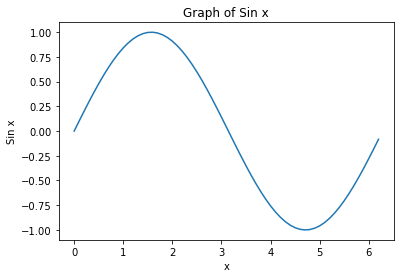

In [140]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('Sin x')
plt.title('Graph of Sin x')

In [145]:
x = np.linspace(-1,1,100)

In [146]:
y=x**2

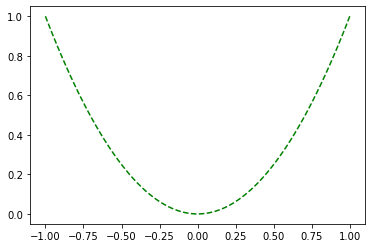

In [148]:
plt.plot(x,y,'g--')

(0, 2)

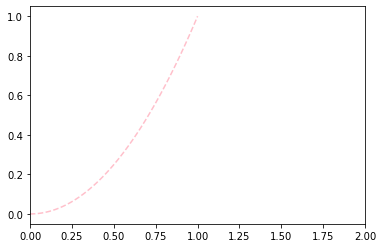

In [151]:
plt.plot(x,y,color='pink',linestyle='dashed')
plt.xlim(0,2)

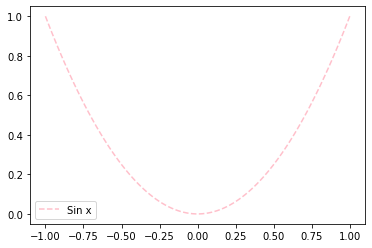

In [152]:
plt.plot(x,y,color='pink',linestyle='dashed',label='Sin x')
plt.legend()

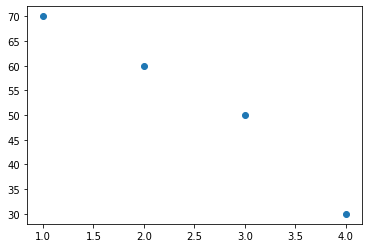

In [155]:
#Scatter
plt.scatter([1,2,3,4],[70,60,50,30])

In [156]:
from sklearn.datasets import load_iris
iris = load_iris()  #Load the Iris data
iris #Show the iris data: data/ features and target

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Text(0, 0.5, 'sepal width (cm)')

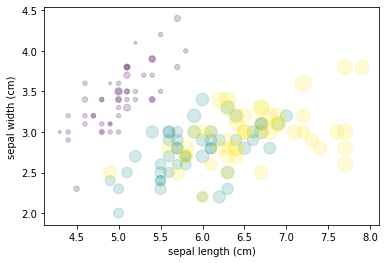

In [161]:
features = iris.data.T #Transpose the data
plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis') 
plt.xlabel(iris.feature_names[0]) 
plt.ylabel(iris.feature_names[1])

#Position - feature[0], feature[1]
#Size - Feature[3]
#Color - Target (Virginica,Setosa, ...)
#alpha - transparency